<a href="https://colab.research.google.com/github/ElenaShargina/nnetworks/blob/main/(6)_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сверточная сеть на архитектуре LeNet 5 для распознавания рукописных цифр

Тестовые данные - набор картинок с рукописными цифрами [mnist](https://keras.io/api/datasets/mnist/). 


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Подготовка данных

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Размер тренировочной выборки: {x_train.shape} , {y_train.shape}')
print(f'Размер проверочной выборки: {x_test.shape} , {y_test.shape}')

Размер тренировочной выборки: (60000, 28, 28) , (60000,)
Размер проверочной выборки: (10000, 28, 28) , (10000,)


**Просмотр примеров данных**

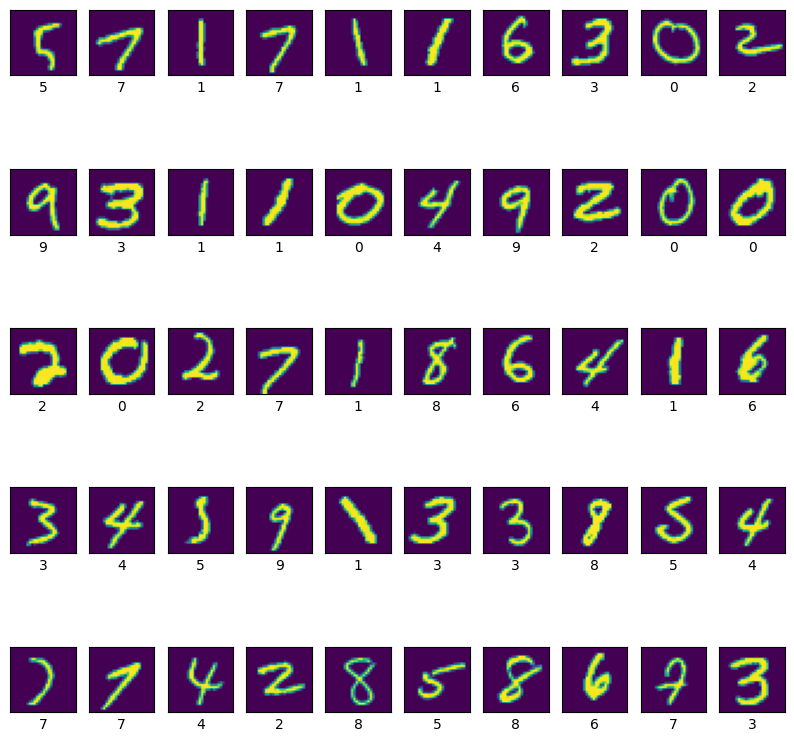

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])

**Нормализуем данные**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

**Преобразуем правильные ответы в формат one hot encoding**

In [ ]:
n = 100
print(f'Правильный ответ до преобразования: {y_train[n]} ')
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
print(f'Правильный ответ после преобразования: {y_train[n]} ')

Правильный ответ до преобразования: 5 
Правильный ответ после преобразования: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 


## Создаем нейронную сеть

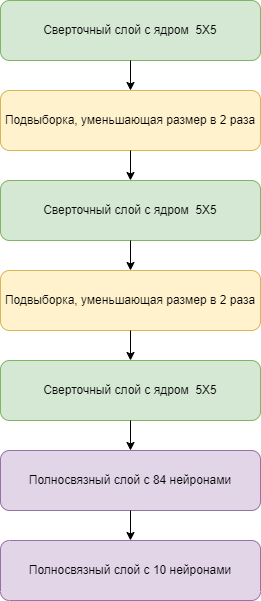



In [ ]:
# Создаем последовательную модель по архитектуре LeNet 5
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(28, (5, 5), padding='same', input_shape=(28, 28,1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(120, (5, 5), activation='relu') )
model.add(Flatten())
model.add(Dense(84))
model.add(Dense(10, activation="softmax"))

**Печатаем информацию о сети**

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 28)        728       
                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 28)       0         
 gePooling2D)                                                    
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 28)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 16)        11216     
                                                                 
 average_pooling2d_11 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 16)         

**Компилируем модель**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=50,
              validation_split=0.1,
              verbose=2)

Epoch 1/50
422/422 - 4s - loss: 0.3655 - accuracy: 0.8881 - val_loss: 0.0915 - val_accuracy: 0.9753 - 4s/epoch - 10ms/step
Epoch 2/50
422/422 - 2s - loss: 0.1155 - accuracy: 0.9646 - val_loss: 0.0634 - val_accuracy: 0.9828 - 2s/epoch - 4ms/step
Epoch 3/50
422/422 - 2s - loss: 0.0866 - accuracy: 0.9736 - val_loss: 0.0499 - val_accuracy: 0.9850 - 2s/epoch - 4ms/step
Epoch 4/50
422/422 - 2s - loss: 0.0692 - accuracy: 0.9783 - val_loss: 0.0407 - val_accuracy: 0.9885 - 2s/epoch - 5ms/step
Epoch 5/50
422/422 - 2s - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0429 - val_accuracy: 0.9872 - 2s/epoch - 5ms/step
Epoch 6/50
422/422 - 2s - loss: 0.0535 - accuracy: 0.9829 - val_loss: 0.0353 - val_accuracy: 0.9907 - 2s/epoch - 4ms/step
Epoch 7/50
422/422 - 2s - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0340 - val_accuracy: 0.9928 - 2s/epoch - 4ms/step
Epoch 8/50
422/422 - 2s - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0353 - val_accuracy: 0.9918 - 2s/epoch - 4ms/step
Epoch 9/50
422/422 - 2s

## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=1)


313/313 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.9932


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 99.32


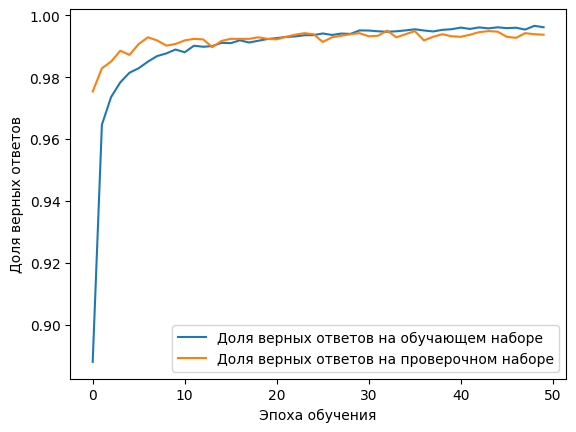

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

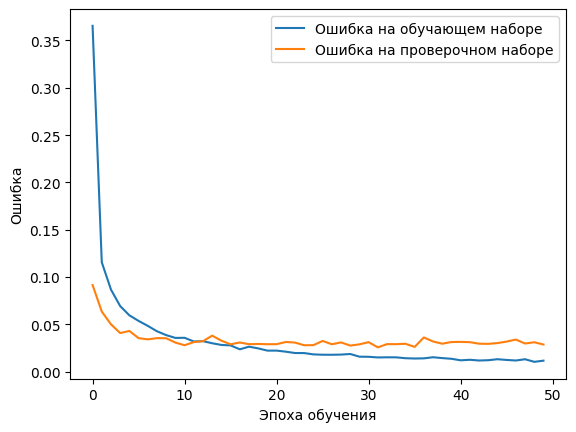

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

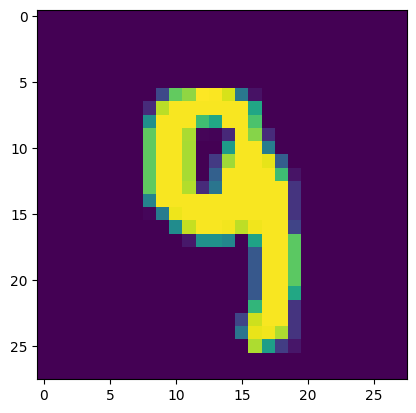

In [ ]:
index=4555
plt.imshow(x_test[index])
plt.show()

**Преобразование тестового изображения**

In [ ]:
x = x_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 28ms/step


**Печатаем результаты распознавания**

In [ ]:
print(prediction[0])
print(np.argmax(prediction[0]))

[6.2963085e-10 5.3459576e-08 1.3604501e-09 5.8962215e-08 1.3609338e-04
 5.3616734e-08 1.4396925e-09 3.6404967e-05 3.1784726e-09 9.9982733e-01]
9
